# Demo for generating complete LUTs from partial input



In [23]:
from cana.datasets.bio import PARTIAL_LUTS_DEMO
from cana.drawing.schema_vis import plot_schemata
from cana.drawing.plot_look_up_table import plot_look_up_table
from cana.utils import fill_out_lut

from cana.boolean_node import BooleanNode



## Partial LUTs

These are incomplete effective graphs with '-' signifying the wildcard symbol. Visually inspecting an effective graph doesn't allow us to infer its status of completeness or identify any inherent contradictions within the inputs.

The fill_out_lut() function enables us to check for contradictory output data. The contradictory outputs are marked by '!'

The fill_out_lut() function also checks for missing rules in the LUT, allowing us to correct out data infered from sources and explore state spaces yet to be understood.  These outputs are marked by '?'.

In [24]:
# Using the fill_out_lut function found in utils.py

partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [('1--','1'),('101','0'),('011','0'),('01-','1')],
    [('0--0','0'),('1--1','0'),('0111','1'),('0011','1')],
]
generated_lut = fill_out_lut(partial_luts[1])
generated_lut

[('000', '?'),
 ('001', '?'),
 ('010', '1'),
 ('011', '!'),
 ('100', '1'),
 ('101', '!'),
 ('110', '1'),
 ('111', '1')]

## Partial LUTs in BNS format

BNS is a software tool for computing attractors in Boolean Networks with Synchronous update. Synchronous Boolean networks are used for the modeling of genetic regulatory networks.

BNS reads in a Boolean network description represented in a .cnet format similar to the Berkeley Logic Interchange Format (BLIF) format commonly used in synthesis and verification tools and prints out the set of network's attractors.

Check: <https://people.kth.se/~dubrova/bns.html>

Entry clash in node  5  for  {'000'}  i.e. State number:  0
<BNode(id=5, name='Six', k=2, inputs=[0,1], state='0', outputs=[0,1,?,1] constant=False)>


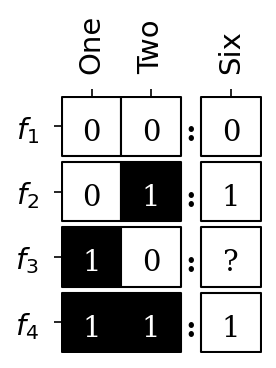

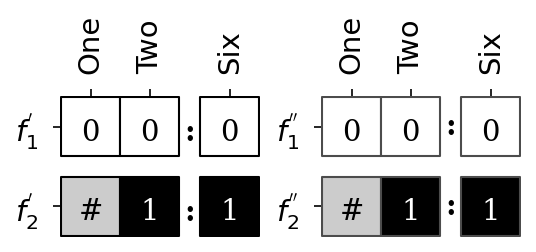

In [25]:
partial_luts = PARTIAL_LUTS_DEMO() # Instantiating a sample partial_luts dataset from the dataset folder.

node = partial_luts.nodes[5]

print(node)
# print(node.look_up_table())
# print(node.schemata_look_up_table())

plot_look_up_table(node)
plot_schemata(node)

In [26]:
# plot_schemata(node)
# plot_look_up_table(node)

## Instantiating a BooleanNode object using partial LUT



In [27]:


partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [('1--','1'),('101','0'),('011','0'),('01-','1')],
    [('0--0','0'),('1--1','0'),('0111','1'),('0011','1')],
]
partial_lut = partial_luts[1]


generated_lut = fill_out_lut(partial_lut) # Using the fill_out_lut function found in utils.py
output_list = [x[1] for x in generated_lut] # Extracting the output values from the generated_lut
print(output_list)
generated_node = BooleanNode.from_output_list(output_list) # Instantiating a BooleanNode object from the output_list
generated_node.look_up_table() # Displaying the look-up table of the generated_node

['?', '?', '1', '!', '1', '!', '1', '1']


,In:,Out:
0,000,?
1,001,?
2,010,1
3,011,!
4,100,1
5,101,!
6,110,1
7,111,1


In [32]:
# Combining the above functions into a single function under BooleanNode class

generated_node = BooleanNode.from_partial_lut(partial_lut) 
print(generated_node)
generated_node.look_up_table()


<BNode(id=0, name='x', k=3, inputs=[1,2,3], state='0', outputs=[?,?,1,!,1,!,1,1] constant=False)>


,In:,Out:
0,000,?
1,001,?
2,010,1
3,011,!
4,100,1
5,101,!
6,110,1
7,111,1
